<a href="https://colab.research.google.com/github/ehpub/statistics_python/blob/main/%ED%86%B5%EA%B3%84_with_python_t_%EA%B2%80%EC%A0%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[설명](https://ehpub.co.kr/t-%ea%b2%80%ec%a0%95-%ed%8c%8c%ec%9d%b4%ec%8d%ac%ec%9c%bc%eb%a1%9c-%eb%8b%a4%eb%a3%a8%eb%8a%94-%ed%86%b5%ea%b3%84/)

In [1]:
import scipy as sp
from scipy import stats
from scipy.stats import t
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## t 검정

가설 검정을 이용하여 모집단의 평균을 평가하는 도구를 세 가지 방법이 있습니다.

1표본 t검정

독립 2표본 t검정

종속(쌍체) 표본 t검정

### t 검정 조건

연속형 데이터

랜덤 표본 데이터

모집단의 분포가 정규분포에 유사

분산에 동질성이 있다.

- 1표본 t검정

one sample T test라고 부릅니다.

모분산을 모를 때 평균의 차이를 비교하는 검정입니다.

과자 A에는 50개의 알사탕이 들어있다고 광고를 하고 있다.

10개의 과자 A를 구입한 후 알사탕 개수를 세 보니 다음과 같았다고 한다.

49, 52, 45, 53, 49, 50, 55, 43, 44, 48

유의수준 0.05에서 광고가 유의한 지 검정하시오.

In [59]:
data = np.array([49, 52, 45, 53, 49, 50, 55, 43, 44, 48])
stat,pv = stats.ttest_1samp(data,50)
print(f"양측 검정으로 p-value는 {pv:.3f}")
if pv>0.05:
  print("귀무 가설을 기각할 수 없다. 따라서 광고는 유의하다. ")
  print("과자 A에는 50개의 알사탕이 들어있다는 것은 타당하다.")
else:
  print("귀무 가설을 기각한다. 따라서 광고는 유의하지 않다.")
  print("과자 A에는 50개의 알사탕이 들어있다는 것은 타당하지 않다.")

양측 검정으로 p-value는 0.360
귀무 가설을 기각할 수 없다. 따라서 광고는 유의하다. 
과자 A에는 50개의 알사탕이 들어있다는 것은 타당하다.


In [60]:
n = len(data)
df = n-1
t_ = t(df)
p_05 = t_.ppf(0.975)
data_mean = data.mean()
data_std = data.std(ddof=1)
lp= data_mean - p_05*(data_std/np.sqrt(n))
hp = data_mean + p_05*(data_std/np.sqrt(n))
print(f"유의수준 0.05 [{lp:.4f},{hp:.4f}]")

유의수준 0.05 [45.9826,51.6174]


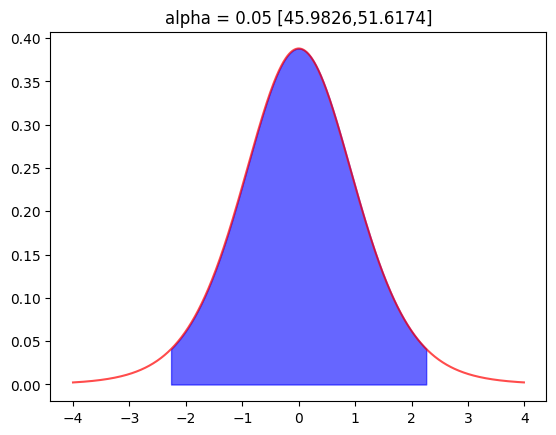

In [62]:
y = t_.pdf(np.arange(-4,4,0.01))
plt.plot(np.arange(-4,4,0.01),y,alpha=0.7,color='r')

y2 = t_.pdf(np.arange(-p_05,p_05,0.01))
plt.fill_between(np.arange(-p_05,p_05,0.01),y2,alpha=0.6,color='b')
plt.title(f"alpha = 0.05 [{lp:.4f},{hp:.4f}]")
plt.show()

홍길동의 몸무게를 10번 계측을 한 결과는 다음과 같다.

74, 73, 75, 73, 75, 74, 73, 73, 74, 72

신뢰구간 95%(유의수준 0.05)에서 홍길동의 몸무게가 73보다 작다고 할 수 있는지 검정하시오.

In [65]:
data = np.array([74, 73, 75, 73, 75, 74, 73, 73, 74, 72])
weight = 73
stat,pv = stats.ttest_1samp(data,weight,alternative='greater')
print(f"단측 검정으로 p-value는 {pv:.4f}")
if pv>=0.05:
  print(f"귀무 가설을 기각할 수 없다. 따라서 홍길동의 몸무게는 {weight}보다 작다고 할 수 없다.")
else:
  print(f"귀무 가설을 기각한다. 따라서 홍길동의 몸무게는 {weight}보다 작다고 할 수 있다.")

단측 검정으로 p-value는 0.0406
귀무 가설을 기각한다. 따라서 홍길동의 몸무게는 73보다 작다고 할 수 있다.


In [66]:
stat,pv = stats.ttest_1samp(data,73)
print(f"단측 검정으로 p-value는 {pv/2:.4f}") #단측검정은 양측 검정/2

단측 검정으로 p-value는 0.0406


In [22]:
n = len(data)
df = n-1
t_ = t(df)
data_mean = data.mean()
data_std = data.std(ddof=1)
p_05 = t_.ppf(0.95)
lp= data_mean - p_05*(data_std/np.sqrt(n))
print(f"유의수준 0.05 [,{lp:.4f}]")

유의수준 0.05 [,73.0400]


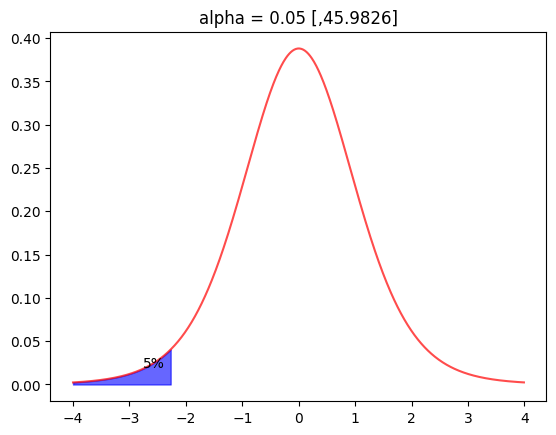

In [67]:
y = t_.pdf(np.arange(-4,4,0.01))
plt.plot(np.arange(-4,4,0.01),y,alpha=0.7,color='r')

y2 = t_.pdf(np.arange(-4,-p_05,0.01))
plt.fill_between(np.arange(-4,-p_05,0.01),y2,alpha=0.6,color='b')
plt.text(-p_05-0.5,0.02,"5%")
plt.title(f"alpha = 0.05 [,{lp:.4f}]")
plt.show()

- 종속 표본 t검정

한 집단의 두 개의 데이터를 비교하는 검정


당뇨 치료제 A를 복용 전 수치와 1달간 복용 후 수치이다.

당뇨 치료제 A를 복용 전과 복용 후에 차이가 있는지 유의수준 5%에서 검정하시오.

복용 전: 440, 90, 120, 220, 230, 320, 450, 180

복용 후: 220, 80, 100, 110, 180, 250, 350, 170

In [51]:
data_a = np.array([440, 90, 120, 220, 230, 320, 450, 180])
data_b = np.array([220, 80, 100, 110, 180, 250, 350, 170])
diff = data_b - data_a
stat,pv = stats.ttest_1samp(diff,0)
print(f"양측 검정으로 p-value는 {pv:.3f}")
if pv>0.05:
  print("귀무 가설을 기각할 수 없다. 따라서 치료제는 유의하지 않다. ")
else:
  print("귀무 가설을 기각한다. 따라서 치료제는 유의하다.")

양측 검정으로 p-value는 0.021
귀무 가설을 기각한다. 따라서 치료제는 유의하다.


In [56]:
data_a = np.array([440, 90, 120, 220, 230, 320, 450, 180])
data_b = np.array([220, 80, 100, 110, 180, 250, 350, 170])
diff = data_b - data_a
stat,pv = stats.ttest_rel(data_a,data_b,alternative='two-sided')
print(f"양측 검정으로 p-value는 {pv:.3f}")
if pv>0.05:
  print("귀무 가설을 기각할 수 없다. 따라서 치료제는 유의하지 않다. ")
else:
  print("귀무 가설을 기각한다. 따라서 치료제는 유의하다.")

양측 검정으로 p-value는 0.021
귀무 가설을 기각한다. 따라서 치료제는 유의하다.


당뇨 치료제 A를 복용 전 수치와 1달간 복용 후 수치이다.

당뇨 치료제 A를 복용 후에 당뇨 수치를 낮추는 효과가 있는지 유의 수준 0.05에서 검정하시오.

복용 전: 440, 90, 120, 220, 230, 320, 450, 180

복용 후: 220, 80, 100, 110, 180, 250, 350, 170

In [58]:
data_a = np.array([440, 90, 120, 220, 230, 320, 450, 180])
data_b = np.array([220, 80, 100, 110, 180, 250, 350, 170])
diff = data_b - data_a
stat,pv = stats.ttest_rel(data_a,data_b,alternative='greater') #치료 전이 더 큰지(치료 후가 더 작은지)
print(f"단측 검정으로 p-value는 {pv:.3f}")
if pv>0.05:
  print("귀무 가설을 기각할 수 없다. 따라서 치료제는 유의하지 않다. ")
else:
  print("귀무 가설을 기각한다. 따라서 치료제는 유의하다.")

단측 검정으로 p-value는 0.011
귀무 가설을 기각한다. 따라서 치료제는 유의하다.


- 독립 2표본 t검정

서로 다른 두 그룹의 평균이 같은지 검정

'2집단 t검정' 혹은 '2표본 t검정'이라고도 부른다.

A, B 두 지역에 학생 성적이 있다.

지역 따라 성적에 차이가 있는지 유의수준 0.05에서 검정하시오.

A 그룹 성적: 90, 87, 74, 85, 98, 82

B 그룹 성적: 85, 92, 72, 86

In [45]:
data_a = np.array([90, 87, 74, 85, 98, 82])
data_b = np.array([85, 92, 72, 86])
stat, pvalue = stats.ttest_ind(data_a,data_b)
print(f"양측 검정으로 p-value는 {pvalue:.4f}")
if pvalue>=0.05:
  print(f"귀무 가설을 기각할 수 없다. 따라서 A교재 사용에 따라 학습 효과에 차이가 있다고 할 수 없다.")
else:
  print(f"귀무 가설을 기각한다. 따라서 A교재 사용에 따라 학습 효과에 차이가 있다고 할 수 있다.")

양측 검정으로 p-value는 0.2587
귀무 가설을 기각할 수 없다. 따라서 A교재 사용에 따라 학습 효과에 차이가 있다고 할 수 없다.


A, B 두 지역에 학생 성적이 있다.

지역 따라 성적에 차이가 있는지 유의수준 0.05에서 검정하시오.

A 그룹 성적: 90, 87, 74, 85, 98, 82

B 그룹 성적: 56, 65, 77, 80

In [48]:
data_a = np.array([90, 87, 74, 85, 98, 82])
data_b = np.array([56, 65, 77, 80])
stat, pvalue = stats.ttest_ind(data_a,data_b)
print(f"양측 검정으로 p-value는 {pvalue:.4f}")
if pvalue>=0.05:
  print(f"귀무 가설을 기각할 수 없다. 따라서 A교재 사용에 따라 학습 효과에 차이가 있다고 할 수 없다.")
else:
  print(f"귀무 가설을 기각한다. 따라서 A교재 사용에 따라 학습 효과에 차이가 있다고 할 수 있다.")

양측 검정으로 p-value는 0.0250
귀무 가설을 기각한다. 따라서 A교재 사용에 따라 학습 효과에 차이가 있다고 할 수 있다.


다음은 대학교 졸업 여부에 따른 두 그룹의 연봉이다.

대학교 졸업하였을 때 연봉이 더 높다고 할 수 있는지 유의수준 0.05에서 검정하시오.

졸업 O: 4000, 3500, 6000, 8000, 5500, 4300

졸업 X: 4000, 3800, 4200, 3600, 5200, 6000

In [36]:
data_a = np.array([4000, 3500, 6000, 8000, 5500, 4300])
data_b = np.array([4000, 3800, 4200, 3600, 5200, 6000])
stat, pvalue = stats.ttest_ind(data_a,data_b,alternative='greater')
print(f"단측 검정으로 p-value는 {pvalue:.4f}")
if pvalue>=0.05:
  print(f"귀무 가설을 기각할 수 없다. 따라서 대학교 졸업한 사람의 연봉이 더 많다고 볼 수 없다.")
else:
  print(f"귀무 가설을 기각한다. 따라서 대학교 졸업한 사람의 연봉이 더 많다고 볼 수 있다.")

단측 검정으로 p-value는 0.1784
귀무 가설을 기각할 수 없다. 따라서 대학교 졸업한 사람의 연봉이 더 많다고 볼 수 없다.
